# Exercise 3 - Birthdays

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statistics

## Part 1

### Simulation

In [48]:
# Calculate the chance that two people in a group of n people share birthdays
def calculate_birthday_probability(n):
    chance = 1
    for x in range(0, n):
        chance = chance * (365-x)/365
    return (1 - chance)

In [49]:
data = []

for n in range(0, 366):
    probability = calculate_birthday_probability(n)
    data.append(probability)

### Visualization

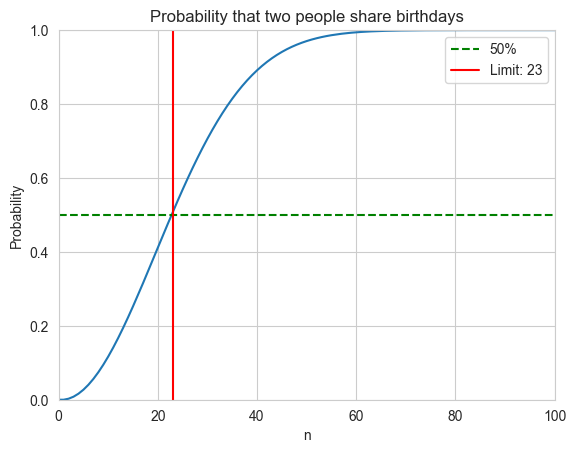

In [50]:
# Let's visualize the probability. At 1 it is 0, and at 366 it is 100%
sns.set_style("whitegrid")

plt.ylabel("Probability")
plt.xlabel("n")
plt.title("Probability that two people share birthdays")

sns.lineplot(data)

plt.ylim(0, 1)
plt.xlim(0, 100)

limit = next(x for x, probability in enumerate(data) if probability > 0.5)

plt.axhline(y=0.5, c='green', linestyle="--", label="50%")
plt.axvline(x=limit, c='red', linestyle="-", label="Limit: " + str(limit))

plt.legend()

After the group reaches 23 members, there is at least a 50% chance that two members share birthdays.

## Part 2

### Simulation

In [51]:
N_SIMULATIONS = 1000

In [59]:
# Adds a person with a random birthday to the group. When each birthday in list_of_people is True, the function returns
# the number of additions that had to be made in the group
def add_person_to_group():
    num_persons = 0
    list_of_people = [False] * 365
    group_filled = False

    while not group_filled:
        new_birthday = random.randint(0, 364)
        list_of_people[new_birthday] = True
        num_persons = num_persons + 1
        if num_persons > 366:
            group_filled = all(x == True for x in list_of_people)

    return num_persons

In [60]:
# Runs simulation n times
birthday_data = []

for i in range(N_SIMULATIONS):
    birthday_data.append(add_person_to_group())

### Visualization

<AxesSubplot: title={'center': 'Every Date a Birthday'}, ylabel='Additions before every date covered'>

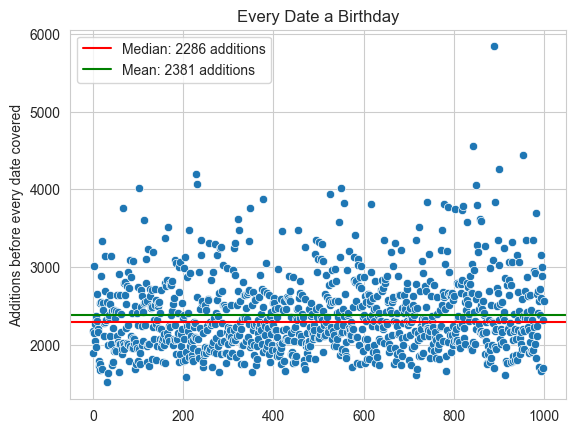

In [54]:
# Let's plot each attempt, and find the median and mean number of additions that had to be made!
plt.title("Every Date a Birthday")
plt.ylabel("Additions before every date covered")

y = birthday_data
y_median = round(statistics.median(y), 0)
y_mean = round(statistics.mean(y), 0)

plt.axhline(y_median, c='red', linestyle="-", label="Median: " + str(int(y_median)) + " additions")
plt.axhline(y_mean, c='green', linestyle="-", label="Mean: " + str(int(y_mean)) + " additions")

sns.scatterplot(y)